In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pymc as pm
import scipy.signal as signal
import arviz as az
import aesara
import aesara.tensor as at

ImportError: cannot import name 'Output' from 'pytensor.graph.fg' (d:\miniconda3\envs\pymc_env\lib\site-packages\pytensor\graph\fg.py)

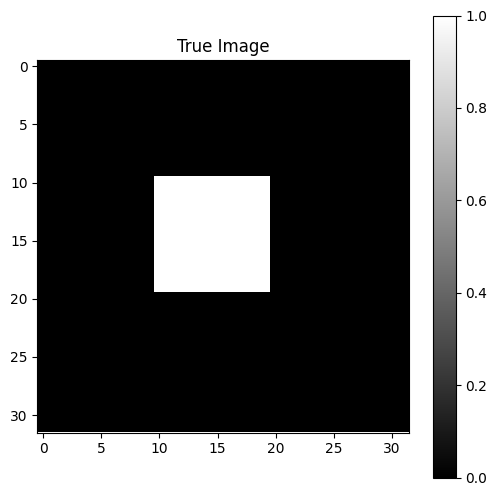

In [3]:
# 定义清晰的图像 (32x32)
np.random.seed(42)
true_image = np.zeros((32, 32))
true_image[10:20, 10:20] = 1.0  # 一个简单的方形物体

# 可视化清晰图像
plt.figure(figsize=(6, 6))
plt.title("True Image")
plt.imshow(true_image, cmap="gray")
plt.colorbar()
plt.show()

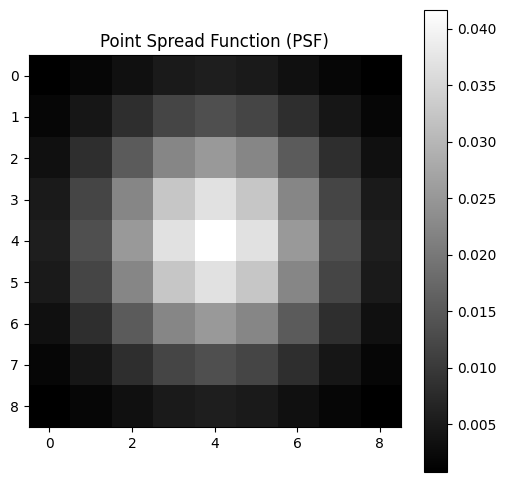

In [4]:
# 定义高斯点扩散函数 (PSF)
def gaussian_kernel(size, sigma):
    """生成二维高斯核"""
    kernel = np.fromfunction(
        lambda x, y: (1/(2*np.pi*sigma**2)) * np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2)/(2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)  # 归一化

psf = gaussian_kernel(9, 2.0)  # 9x9 的高斯核，sigma=2.0

# 可视化 PSF
plt.figure(figsize=(6, 6))
plt.title("Point Spread Function (PSF)")
plt.imshow(psf, cmap="gray")
plt.colorbar()
plt.show()

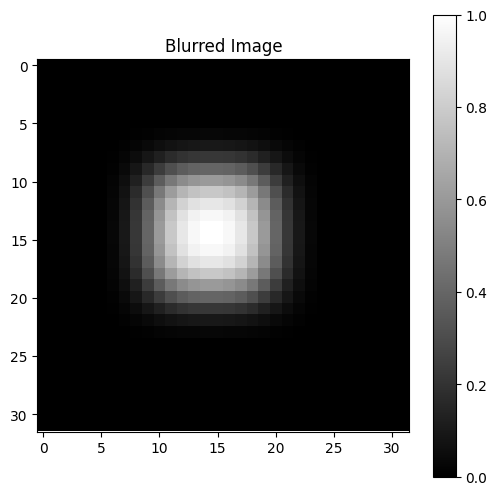

In [6]:
# 使用卷积生成模糊图像
blurred_image = signal.convolve2d(true_image, psf, mode="same")

# 可视化模糊图像
plt.figure(figsize=(6, 6))
plt.title("Blurred Image")
plt.imshow(blurred_image, cmap="gray")
plt.colorbar()
plt.show()

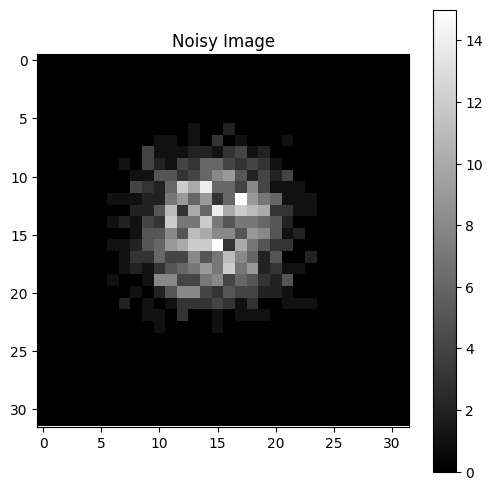

In [7]:
# 添加泊松噪声
noisy_image = np.random.poisson(blurred_image * 10)  # 乘以 10 是为了增加信号强度

# 可视化被污染的图像
plt.figure(figsize=(6, 6))
plt.title("Noisy Image")
plt.imshow(noisy_image, cmap="gray")
plt.colorbar()
plt.show()

In [8]:
with pm.Model() as model:
    # 先验分布：清晰图像的每个像素值服从均匀分布
    x = pm.Uniform("x", lower=0, upper=1, shape=(32, 32))
    
    # 模糊过程：清晰图像与 PSF 卷积
    blurred = pm.Deterministic("blurred", signal.convolve2d(x, psf, mode="same"))
    
    # 似然函数：观测图像服从泊松分布
    y_obs = pm.Poisson("y_obs", mu=blurred * 10, observed=noisy_image)

ValueError: convolve2d inputs must both be 2-D arrays